#Data Analysis

In [0]:
service_credential = dbutils.secrets.get(scope="databricks-app-kv",key="databricks-application")

spark.conf.set("fs.azure.account.auth.type.20230821desa.dfs.core.windows.net", "OAuth")
spark.conf.set("fs.azure.account.oauth.provider.type.20230821desa.dfs.core.windows.net", "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider")
spark.conf.set("fs.azure.account.oauth2.client.id.20230821desa.dfs.core.windows.net", "de4ff859-02b1-4e2f-9d16-b578fa03df4f")
spark.conf.set("fs.azure.account.oauth2.client.secret.20230821desa.dfs.core.windows.net", service_credential)
spark.conf.set("fs.azure.account.oauth2.client.endpoint.20230821desa.dfs.core.windows.net", "https://login.microsoftonline.com/33da9f3f-4c1a-4640-8ce1-3f63024aea1d/oauth2/token")

In [0]:
from pyspark.sql.functions import count, avg
from pyspark.sql.functions import countDistinct, col

##Load Fact Table

In [0]:
fact_table = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/fact_table/*")

##Load Dimensions

In [0]:
actor_table = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/actors/*")
orgs_table = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/orgs/*")
repos_table = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/repos/*")

In [0]:
sub_tables = {}

In [0]:
actors = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/actors/*")

In [0]:
sub_tables['PushEvent_payload'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/PushEvent_payload/*")
sub_tables['pages'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/pages/*")
sub_tables['members'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/members/*")
sub_tables['releases'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/releases/*")
sub_tables['comments'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/comments/*")
sub_tables['pull_requests'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/pull_requests/*")
sub_tables['reviews'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/reviews/*")
sub_tables['CreateEvent_payload'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/CreateEvent_payload/*")
sub_tables['PullRequestReviewCommentEvent_payload'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/PullRequestReviewCommentEvent_payload/*")
sub_tables['issues'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/issues/*")
sub_tables['ForkEvent_payload'] = spark.read.format("parquet").load(f"abfss://team2-project2@20230821desa.dfs.core.windows.net/GoldLayer/ForkEvent_payload/*")

In [0]:
sub_tables['CreateEvent_payload'].display()

id,master_branch,pusher_type,ref_type
19659885638,main,user,tag
19653477530,master,user,branch
19660818024,master,user,branch
19652227019,main,user,repository
19657382477,master,user,branch
19660002631,master,user,repository
19656726571,master,user,branch
19654416652,main,user,branch
19654217523,master,user,repository
19651829801,main,user,repository


#Aggregate_Event_By_Hour

In [0]:
from pyspark.sql.functions import date_trunc, to_timestamp, hour, dayofmonth, to_date
e_b_h_1 = fact_table.withColumn("hour", hour(to_timestamp("created_at","yyyy-MM-dd'T'HH:mm:ss'Z'"))).withColumn("day", dayofmonth(to_date(col("created_at"), "yyyy-MM-dd'T'HH:mm:ss'Z'"))).select('type','hour','day')
e_b_h_2 = e_b_h_1.groupBy('hour','day').count().orderBy('hour','day')

In [0]:
t=[None] * 24
for i in range(24):
    t[i-1] = e_b_h_2.where(col("hour") == i).orderBy('day').select('count').rdd.map(lambda x: x[0]).collect()

index = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11',\
         'Day 12', 'Day 13', 'Day 14', 'Day 15', 'Day 16', 'Day 17', 'Day 18', 'Day 19', 'Day 20', 'Day 21',\
         'Day 22', 'Day 23', 'Day 24', 'Day 25', 'Day 26', 'Day 27', 'Day 28', 'Day 29', 'Day 30', 'Day 31']

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-173403117478661>:8
      3     t[i-1] = e_b_h_2.where(col("hour") == i).orderBy('day').select('count').rdd.map(lambda x: x[0]).collect()
      5 index = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11',\
      6          'Day 12', 'Day 13', 'Day 14', 'Day 15', 'Day 16', 'Day 17', 'Day 18', 'Day 19', 'Day 20', 'Day 21',\
      7          'Day 22', 'Day 23', 'Day 24', 'Day 25', 'Day 26', 'Day 27', 'Day 28', 'Day 29', 'Day 30', 'Day 31']
----> 8 plot_data = ps.DataFrame({'00:00':t[0], '01:00':t[1], '02:00':t[2], '03:00':t[3], '04:00':t[4], '05:00':t[5], '06:00':t[6],\
      9                    '07:00':t[7], '08:00':t[8], '09:00':t[9], '10:00':t[10], '11:00':t[11], '12:00':t[12], '13:00':t[13],\
     10                    '14:00':t[14], '15:00':t[15], '16:00':t[16], '17:00':t

<AxesSubplot:title={'center':'Events per Hour by Day'}>

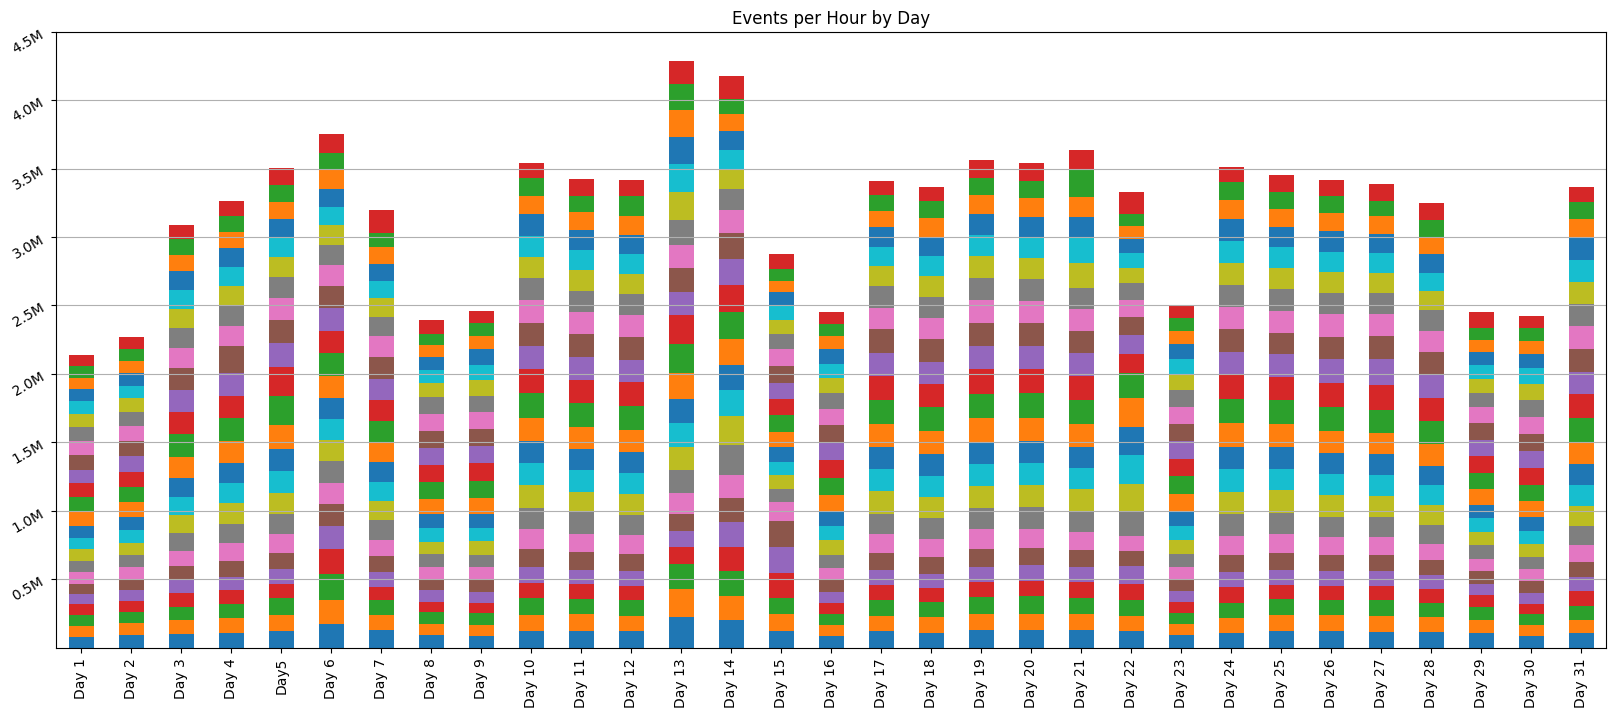

In [0]:
import pandas as pd
plot_data = pd.DataFrame({'00:00':t[0], '01:00':t[1], '02:00':t[2], '03:00':t[3], '04:00':t[4], '05:00':t[5], '06:00':t[6],\
                   '07:00':t[7], '08:00':t[8], '09:00':t[9], '10:00':t[10], '11:00':t[11], '12:00':t[12], '13:00':t[13],\
                   '14:00':t[14], '15:00':t[15], '16:00':t[16], '17:00':t[17], '18:00':t[18], '19:00':t[19], '20:00':t[20],\
                   '21:00':t[21], '2200':t[22], '23:00':t[23]}, index=index)
ax = plot_data.plot.bar(stacked=True, figsize=(20,8),title="Events per Hour by Day", legend=False, yticks=[500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000])
ax.set_yticklabels(["0.5M","1.0M","1.5M","2.0M","2.5M","3.0M","3.5M","4.0M","4.5M"], rotation=30)
ax.grid('on', axis='y')
fig = ax.get_figure()
fig.savefig(f"/dbfs/FileStore/tables/Event_by_hour.png")
ax

# Breakdown of events by type

In [0]:
from pyspark.sql.functions import count

In [0]:
events_counts = fact_table.groupBy('type')
events_counts = events_counts.agg(count('*').alias('count'))
events_counts = events_counts.sort('count', ascending=False)
events_counts.display()

type,count
PushEvent,50896487
CreateEvent,14717605
PullRequestEvent,9312037
IssueCommentEvent,5329077
WatchEvent,4996977
DeleteEvent,3623788
PullRequestReviewEvent,2500518
IssuesEvent,2280213
ForkEvent,1773342
PullRequestReviewCommentEvent,1438421


Databricks visualization. Run in Databricks to view.

#Aggregation By User

###event totals per actor

In [0]:
actor_groups = fact_table.groupBy(col('actor_id'))
event_counts = actor_groups.agg(count('*').alias('event_count')).sort("event_count", ascending=False)

In [0]:
event_counts.display()

actor_id,event_count
49699333,8125446
41898282,6672284
8517910,1880178
39814207,885427
29139614,780800
10810283,662119
35613825,491780
92907907,382881
96052245,379744
97123285,275108


##average events per user

In [0]:
event_counts.agg(avg('event_count')).display()

avg(event_count)
22.023141641696625


##Event distribution for a single actor

In [0]:
actor_events = fact_table.filter(col('actor_id') == 1212008)
actor_event_groups = actor_events.groupBy('type')
counts = actor_event_groups.agg(count('*').alias('event_count')).sort("event_count", ascending=False)

In [0]:
counts.display()


type,event_count
PushEvent,109
IssueCommentEvent,96
PullRequestReviewEvent,75
PullRequestReviewCommentEvent,56
PullRequestEvent,48
IssuesEvent,24
CreateEvent,14
ForkEvent,2
WatchEvent,1


Databricks visualization. Run in Databricks to view.